In [1]:
import numpy as np
import pandas as pd

df=pd.read_csv("churn_data.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
print(df[df.duplicated(keep='last')])

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [7]:
df=df.drop_duplicates()

In [8]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n\n')

customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
4501-VCPFK    1
6075-SLNIL    1
             ..
1452-KIOVK    1
6713-OKOMC    1
7892-POOKP    1
6388-TABGU    1
9763-GRSKD    1
Name: count, Length: 7043, dtype: int64



gender
Male      3555
Female    3488
Name: count, dtype: int64



SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64



Partner
No     3641
Yes    3402
Name: count, dtype: int64



Dependents
No     4933
Yes    2110
Name: count, dtype: int64



tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64



PhoneService
Yes    6361
No      682
Name: count, dtype: int64



MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64



InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64



OnlineSecurity
No                     3498
Yes                    201

In [9]:
#dropping column value because it will negatively impact the modeling
df.drop('customerID',axis=1,inplace=True)

In [10]:
#handling TotalCharges to numeric so to handle blank values
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())

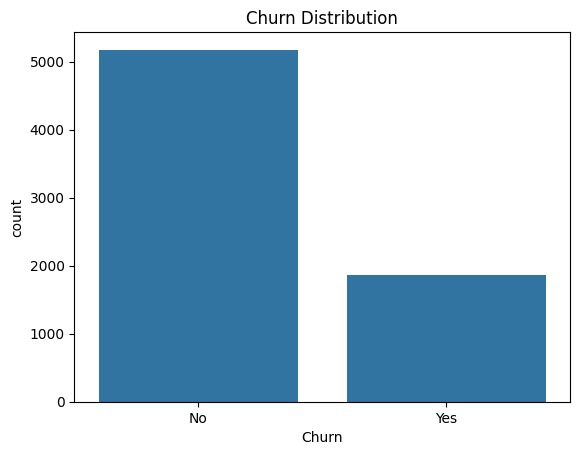

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Churn distribution


sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')

plt.show()


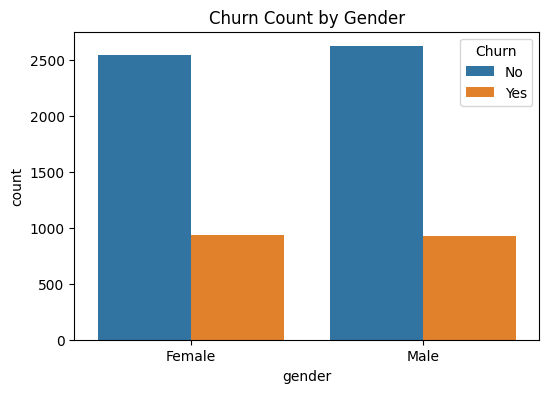

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn Count by Gender')
plt.show()


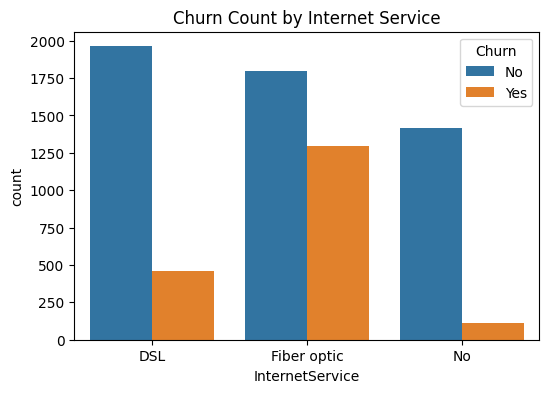

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn Count by Internet Service')
plt.show()

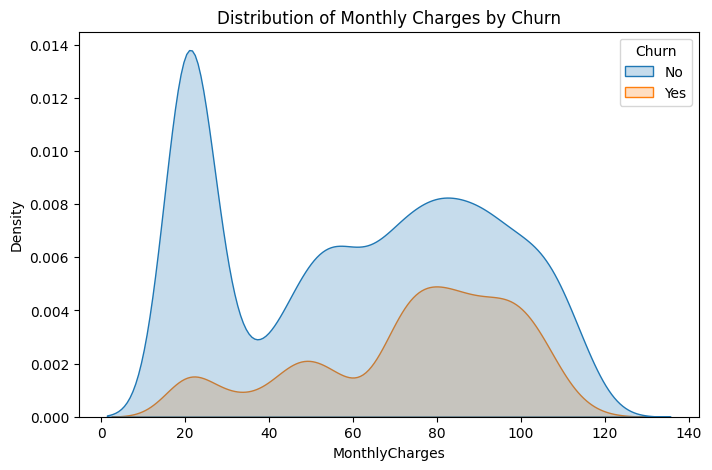

In [14]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True)
plt.title('Distribution of Monthly Charges by Churn')
plt.show()

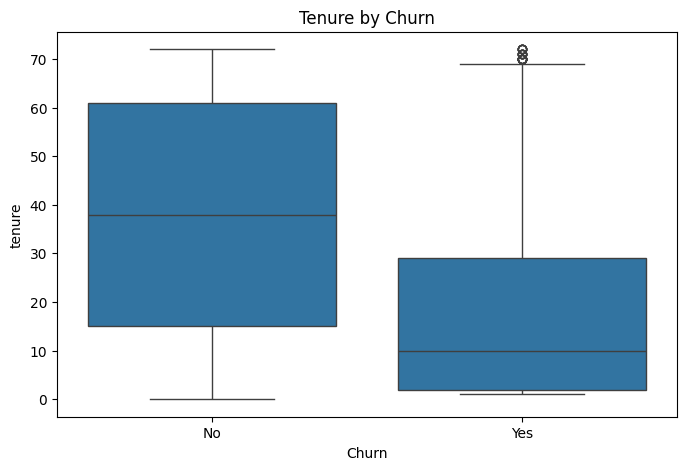

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure by Churn')
plt.show()

In [16]:
#encoding values
df['Churn']=df['Churn'].map({'Yes':1,'No':0})
df['Partner']=df['Partner'].map({'Yes':1,'No':0})
df['Dependents']=df['Dependents'].map({'Yes':1,'No':0})
df['PhoneService']=df['PhoneService'].map({'Yes':1,'No':0})
df['PaperlessBilling']=df['PaperlessBilling'].map({'Yes':1,'No':0})

df['gender']=df['gender'].map({'Female':1,'Male':0})

In [17]:
#encoding other categorical features
cat_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaymentMethod']

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [18]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n\n')

gender
0    3555
1    3488
Name: count, dtype: int64



SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64



Partner
0    3641
1    3402
Name: count, dtype: int64



Dependents
0    4933
1    2110
Name: count, dtype: int64



tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64



PhoneService
1    6361
0     682
Name: count, dtype: int64



PaperlessBilling
1    4171
0    2872
Name: count, dtype: int64



MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
42.40      1
97.90      1
116.40     1
31.65      1
39.05      1
Name: count, Length: 1585, dtype: int64



TotalCharges
20.200      11
1397.475    11
19.750       9
19.650       8
19.900       8
            ..
1990.500     1
7362.900     1
346.450      1
306.600      1
108.150      1
Name: count, Length: 6531, dtype: int64



Churn
0    5174
1    1869
Name: count, dtype: int64



M

In [19]:
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['SeniorCitizen'] = pd.to_numeric(df['SeniorCitizen'], errors='coerce')


In [20]:
df['AvgMonthlyCharges'] = df['TotalCharges'] / (df['tenure'] + 1)
df['SeniorAlone'] = ((df['SeniorCitizen'] == 1) & (df['Partner'] == 0) & (df['Dependents'] == 0)).astype(int)


df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 60, np.inf], labels=['0–12','13–24','25–48','49–60','61+'])
df = pd.get_dummies(df, columns=['tenure_group'], drop_first=True)


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharges']] = scaler.fit_transform(
    df[['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharges']]
)


In [22]:
#pca

In [23]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
X=pca.fit_transform(X)

NameError: name 'X' is not defined

In [ ]:
#train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [ ]:
#xgboost

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(eval_metric='logloss',learning_rate= 0.05, max_depth= 3, n_estimators= 200,subsample=0.8,colsample_bytree=1)
model.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix


y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("confusion_matrix",confusion_matrix(y_test, y_pred))



In [ ]:
#HyperParmeter tuning for  xgb

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    
}

search = RandomizedSearchCV(model, param_distributions=params, scoring='recall', cv=5, n_iter=20, random_state=42)
search.fit(X_train, y_train)
print("Best params:", search.best_params_)


In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop("Churn", axis=1)
y = df["Churn"]

x = pd.get_dummies(x)  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)


In [ ]:
#logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

y_pred = model.predict(X_test)


In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
#BaggingClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

y_rfc=rfc.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_rfc))

print("\nClassification Report:")
print(classification_report(y_test, y_rfc))


In [ ]:
#AdaBoost

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

abc=AdaBoostClassifier(algorithm='SAMME')
abc.fit(x_train,y_train)

y_abc=abc.predict(x_test)
print("random")
print("accuracy",accuracy_score(y_test,y_abc))
print("report",classification_report(y_test,y_abc))

In [ ]:
#GradientBoosing

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)


y_gbc=gbc.predict(x_test)
print("random")
print("accuracy",accuracy_score(y_test,y_gbc))
print("report",classification_report(y_test,y_gbc))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Input
from tensorflow.keras.callbacks import EarlyStopping

# Neural Network Model using original features
model_nn = Sequential([Input(shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5)

history = model_nn.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stop])


loss, accuracy = model_nn.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy}")
